## This model aims to predict human body fat percentage using linear regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset 
df= pd.read_csv('bodyfat.csv')

In [3]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Data Wrangling

In [4]:
# handeling misssing values
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

There are no null values in our dataset.

In [5]:
# Ensuring correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
# dropping dupliacte rows if any
df.drop_duplicates(keep='first',inplace =True)
df.shape

(252, 15)

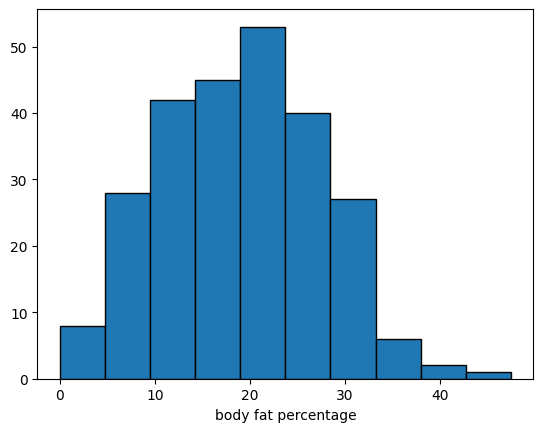

In [7]:
#analysing target variable
plt.hist(df['BodyFat'], edgecolor='black')
plt.xlabel('body fat percentage')
plt.show()

The values in the first bin indicate extremely low bodyfat percentage. Analysing those values and handeling them as necessary.

In [8]:
df.sort_values(by='BodyFat')

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
181,1.1089,0.0,40,118.50,68.00,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
171,1.0983,0.7,35,125.75,65.50,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
170,1.0926,3.0,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
25,1.0911,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
28,1.0910,3.7,27,133.25,64.75,36.4,93.5,73.9,88.5,50.1,34.5,21.3,30.5,27.9,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1.0207,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
191,1.0140,38.1,42,244.25,76.00,41.8,115.2,113.7,112.4,68.5,45.0,25.5,37.1,31.2,19.9
35,1.0101,40.1,49,191.75,65.00,38.4,118.5,113.1,113.8,61.9,38.3,21.9,32.0,29.8,17.0


In [9]:
# Bodyfat percentage of 0 or 0.7 is not possible. 
df.drop([181,171], inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

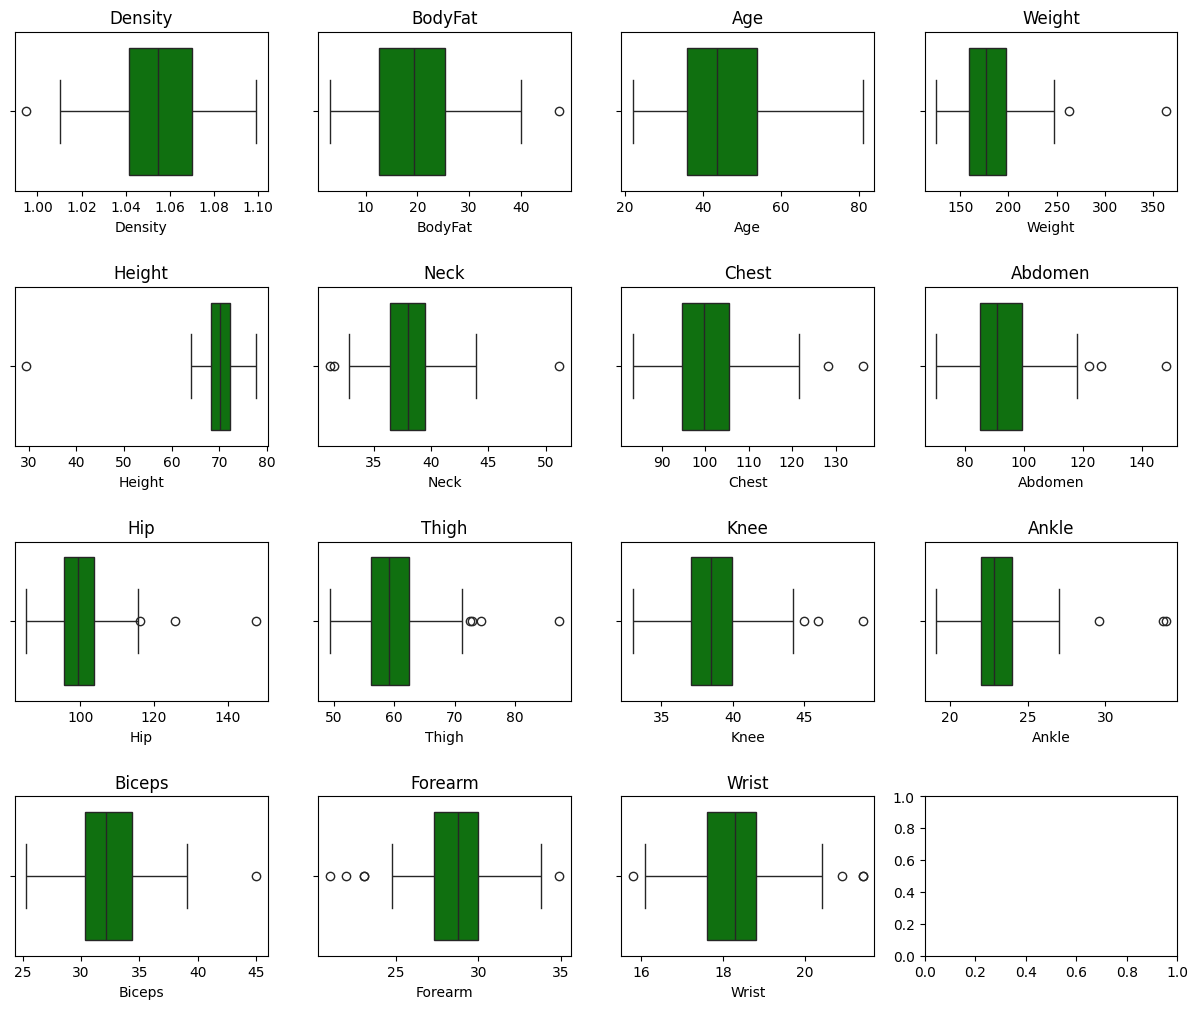

In [10]:
fig, axes= plt.subplots(nrows=4, ncols=4, figsize=(15,12))
for i , col in enumerate(df.columns):
    ax= axes.flat[i]
    sns.boxplot(x=col,data=df, ax=ax, color='green')
    ax.set_title(col)
    
plt.subplots_adjust(hspace=0.6)
plt.show

Plot shows possible outliers in several columns. 

In [11]:
#statiscial analysis 
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.055190,19.30120,44.944000,179.378800,70.176000,38.024800,100.950400,92.718800,100.007200,59.492400,38.626000,23.118400,32.321600,28.691200,18.242000
std,0.018607,8.23016,12.633101,29.059153,3.663086,2.412706,8.328483,10.667279,7.097397,5.179018,2.387569,1.690198,2.981741,2.004554,0.926992
min,0.995000,3.00000,22.000000,125.000000,29.500000,31.100000,83.400000,70.400000,85.300000,49.300000,33.000000,19.100000,25.300000,21.000000,15.800000
25%,1.041400,12.60000,36.000000,159.375000,68.312500,36.400000,94.675000,85.225000,95.600000,56.100000,37.100000,22.000000,30.300000,27.300000,17.600000
50%,1.054800,19.25000,43.500000,176.750000,70.125000,38.000000,99.700000,91.050000,99.300000,59.050000,38.500000,22.800000,32.100000,28.750000,18.300000
75%,1.070050,25.30000,54.000000,197.000000,72.250000,39.475000,105.525000,99.575000,103.575000,62.450000,39.975000,24.000000,34.375000,30.000000,18.800000
max,1.099100,47.50000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [12]:
# weight of 363lbs is uncommon. 
df.loc[df['Weight']==363.15]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
38,1.0202,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4


Density, Weight  and BodyFat measurements seem to contradict each other and are unlikely.

In [13]:
#removing outliers 

for c in df.columns:
    q1= df[c].quantile(0.25)
    q3= df[c].quantile(0.75)
    iqr= q3-q1
    lower_bound= q1- 1.5*iqr
    upper_bound= q3+1.5*iqr
    df = df[(df[c] >= lower_bound) & (df[c] <= upper_bound)]
        
df.shape

(226, 15)

BodyFat is our label or target variable. 

**Identifying relation of different features with target variable.**

*Visual representation of linear relationship of various features with label*

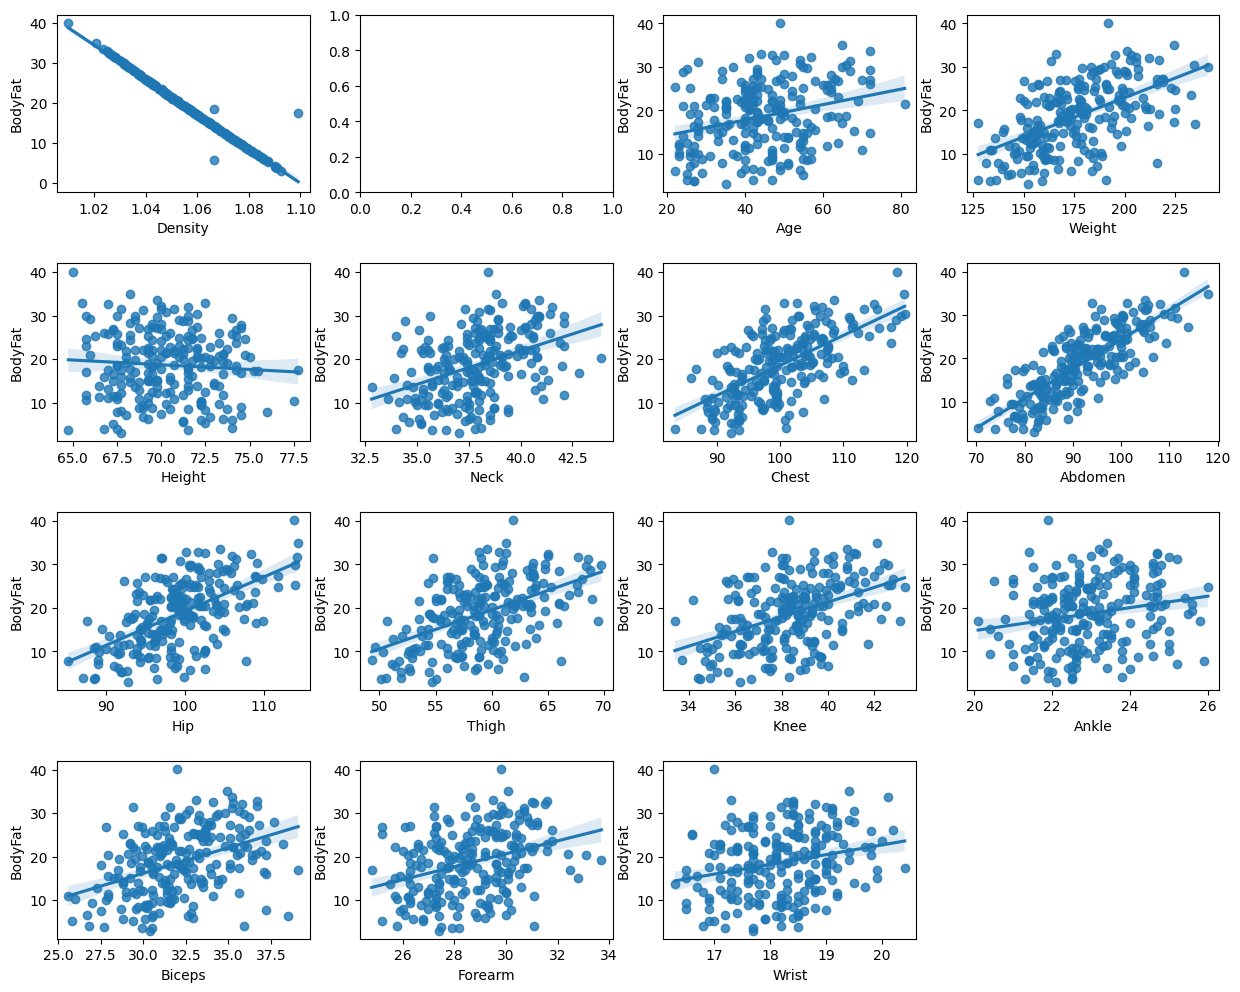

In [14]:
fig, axes= plt.subplots(nrows=4, ncols=4, figsize=(15,12))
axes= axes.flatten()
for i,col in enumerate(df.columns):
    if col!='BodyFat':
        sns.regplot(x=df[col], y=df['BodyFat'], data=df, ax=axes[i])

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.subplots_adjust(hspace=0.4)
plt.show()

<Axes: >

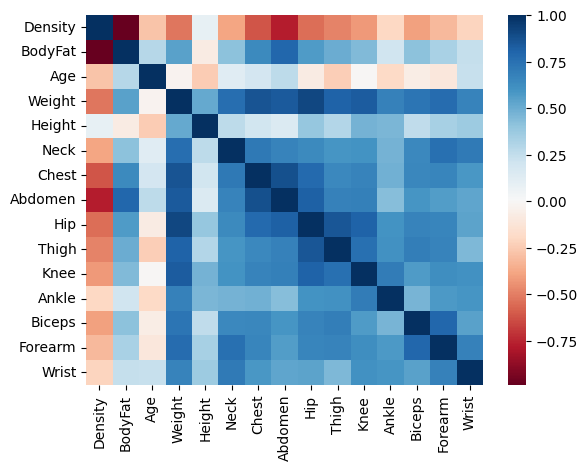

In [15]:
# Visualization of how different features are correlated
corr_matrix= df.corr()
sns.heatmap(corr_matrix, cmap='RdBu')

Pearson's Correlation value closer to 1, closer to -1 , 0 indicate strong positive, strong negative and low or no correlation respectively.

In [16]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.984894,-0.272871,-0.522282,0.092712,-0.386306,-0.613188,-0.773601,-0.547854,-0.484557,-0.422286,-0.201754,-0.402051,-0.314624,-0.209874
BodyFat,-0.984894,1.000000,0.288249,0.549902,-0.071585,0.411012,0.641977,0.793120,0.571462,0.498100,0.444786,0.206604,0.411434,0.332718,0.240176
Age,-0.272871,0.288249,1.000000,-0.029084,-0.246607,0.130288,0.186722,0.266356,-0.075978,-0.238202,-0.004634,-0.187930,-0.066042,-0.101225,0.235161
Weight,-0.522282,0.549902,-0.029084,1.000000,0.517801,0.767391,0.864337,0.837539,0.913397,0.812031,0.833430,0.675507,0.733527,0.769944,0.672800
Height,0.092712,-0.071585,-0.246607,0.517801,1.000000,0.268736,0.193789,0.151392,0.395120,0.298401,0.478652,0.458835,0.257469,0.339610,0.370951
Neck,-0.386306,0.411012,0.130288,0.767391,0.268736,1.000000,0.717042,0.672114,0.639106,0.595951,0.602677,0.478118,0.650887,0.753103,0.708048
Chest,-0.613188,0.641977,0.186722,0.864337,0.193789,0.717042,1.000000,0.879848,0.776430,0.646941,0.668018,0.480986,0.657152,0.662604,0.587284
Abdomen,-0.773601,0.793120,0.266356,0.837539,0.151392,0.672114,0.879848,1.000000,0.819496,0.680138,0.688053,0.427839,0.590473,0.559094,0.527472
Hip,-0.547854,0.571462,-0.075978,0.913397,0.395120,0.639106,0.776430,0.819496,1.000000,0.854087,0.809114,0.597358,0.666790,0.660163,0.535081
Thigh,-0.484557,0.498100,-0.238202,0.812031,0.298401,0.595951,0.646941,0.680138,0.854087,1.000000,0.754820,0.610741,0.691050,0.670739,0.452000


Strong negative correlation : Density

Strong positive correlation : Abdomen

Moderate correlation : Weight, Chest, Hip

*Several features are highly correlated with each other indicating **multicollinearity**.* 

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
z=df.drop('BodyFat',axis=1)
vif_df= pd.DataFrame()
vif_df['Feature']= z.columns
vif_df['vif']= [variance_inflation_factor(z.values,i) for i in range(len(z.columns))]
print(vif_df)

    Feature          vif
0   Density  4871.357830
1       Age    31.726067
2    Weight  1343.376552
3    Height  2185.630341
4      Neck  1265.235316
5     Chest  1522.658174
6   Abdomen   962.363028
7       Hip  2978.031282
8     Thigh  1084.942909
9      Knee  1603.244034
10    Ankle   969.221399
11   Biceps   471.504244
12  Forearm  1289.014953
13    Wrist  1689.877215


Values greater than 10 indicate severe multicollinearity. 

*To mitigate it's effect, we will select features using Lasso.*

#### Feature Selection

In [18]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

input= [('scale',StandardScaler()),
       ('lasso', LassoCV(alphas=[0.0001,0.001,0.01,0.1,1.0,10.0,100,1000], cv=5))]
pipeline=Pipeline(input)
pipeline.fit(z,df['BodyFat'])

coef= pipeline.named_steps['lasso'].coef_
selected_features = z.columns[coef!=0].tolist()
print(selected_features)

['Density', 'Age', 'Chest', 'Abdomen']


#### Developing and Training the model.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
y= df['BodyFat']
x= df[['Density', 'Age', 'Chest', 'Abdomen']]

#splitting the dataset into training and testing dataset
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#scaling the data
sc= StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)

(180, 4) (46, 4) (180,) (46,)


In [21]:
model= LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

#### Model Evaluation

In [22]:
# prediction using training data
training_data_prediction = model.predict(x_train_scaled)

# prediction using testing data
testing_data_prediction = model.predict(x_test_scaled)

Plotting predicted value against actual value to evaluate model's performence

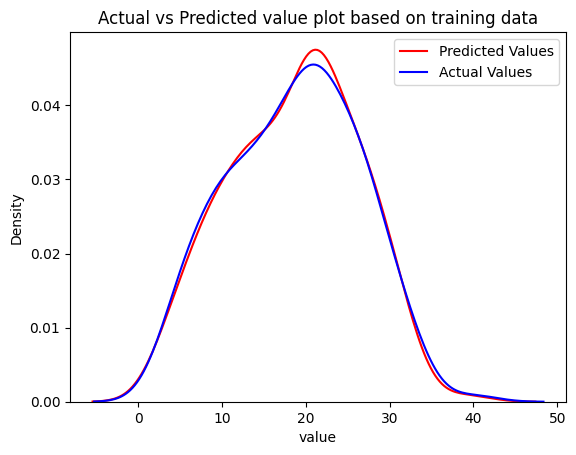

In [23]:
sns.distplot(training_data_prediction, hist=False, label='Predicted Values', color= 'red')
sns.distplot(y_train, hist=False, label='Actual Values',color='blue')
plt.title('Actual vs Predicted value plot based on training data')
plt.xlabel('value')
plt.legend()
plt.show()

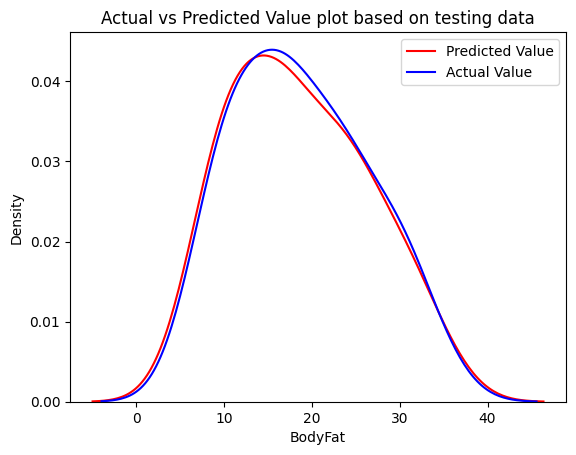

In [24]:
sns.distplot(testing_data_prediction,hist=False, color='red', label='Predicted Value')
sns.distplot(y_test, color='blue',hist=False, label='Actual Value')
plt.title("Actual vs Predicted Value plot based on testing data")
plt.legend()
plt.show()

In [25]:
# calculating mse and R^2 value
mse= mean_squared_error(y_test, testing_data_prediction)
print(f"mean-squared-error value : {mse}")
rscore= model.score(x_test_scaled, y_test)
print(f"R^2 value : {rscore}")

mean-squared-error value : 0.739755795736757
R^2 value : 0.9868620711391616


*The mse and R square value suggest the model performs well.   
Low mse value and high R sq values are good indicators.*